In [87]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from pathlib import Path
import geopandas
import json

In [2]:
DATA_PATH = Path("/Users/luis/projects/lyon_loyers/data")

In [96]:
json.dump(
    json.loads(
        (
            json.dumps(
                json.load(open(DATA_PATH / "car_care.carencadrmtloyer_latest.json"))
            ).replace("loyer_referece_minore", "loyer_reference_minore")
        )
    ),
    open(DATA_PATH / "data_clean.json", "w"),
)

In [97]:
gdf = geopandas.read_file(DATA_PATH / "data_clean.json")

In [98]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   codeiris  233 non-null    object  
 1   zonage    233 non-null    object  
 2   valeurs   233 non-null    object  
 3   commune   233 non-null    object  
 4   insee     233 non-null    object  
 5   gid       233 non-null    object  
 6   geometry  233 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 12.9+ KB


In [86]:
json.segdf.valeurs.iloc[0]

dict

In [5]:
gdf.codeiris.is_unique

True

In [99]:
gdf = pd.concat((gdf, pd.json_normalize(gdf.valeurs.values.tolist())), axis=1)

In [100]:
gdf.columns[gdf.columns.str.contains(r"1\.|2\.|3\.|4 et plus\.")]

Index(['1.1946-70.meuble.loyer_reference',
       '1.1946-70.meuble.majoration_unitaire',
       '1.1946-70.meuble.loyer_reference_majore',
       '1.1946-70.meuble.loyer_reference_minore',
       '1.1946-70.non meuble.loyer_reference',
       '1.1946-70.non meuble.loyer_reference_minore',
       '1.1946-70.non meuble.loyer_reference_majore',
       '1.1971-90.meuble.loyer_reference',
       '1.1971-90.meuble.majoration_unitaire',
       '1.1971-90.meuble.loyer_reference_majore',
       ...
       '4 et plus.avant 1946.non meuble.loyer_reference',
       '4 et plus.avant 1946.non meuble.loyer_reference_minore',
       '4 et plus.avant 1946.non meuble.loyer_reference_majore',
       '4 et plus.après 1990.meuble.loyer_reference',
       '4 et plus.après 1990.meuble.majoration_unitaire',
       '4 et plus.après 1990.meuble.loyer_reference_majore',
       '4 et plus.après 1990.meuble.loyer_reference_minore',
       '4 et plus.après 1990.non meuble.loyer_reference',
       '4 et plus.après 

In [101]:
melted_gdf = gdf.melt(
    id_vars=gdf.columns[~gdf.columns.str.contains(r"1\.|2\.|3\.|4 et plus\.")],
    value_vars=gdf.columns[gdf.columns.str.contains(r"1\.|2\.|3\.|4 et plus\.")],
)

In [102]:
melted_gdf.variable.str.split(".").explode()

0                             1
0                       1946-70
0                        meuble
0               loyer_reference
1                             1
                  ...          
26094    loyer_reference_majore
26095                 4 et plus
26095                après 1990
26095                non meuble
26095    loyer_reference_majore
Name: variable, Length: 104384, dtype: object

In [103]:
melted_gdf[["codeiris", "zonage", "commune", "insee", "gid", "geometry"]]

,codeiris,zonage,commune,insee,gid,geometry
0,692660101,3,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ..."
1,692660102,3,Villeurbanne,69266,934,"POLYGON ((4.86309 45.76930, 4.86235 45.77013, ..."
2,692660103,3,Villeurbanne,69266,935,"POLYGON ((4.87369 45.77059, 4.87358 45.77061, ..."
3,692660201,4,Villeurbanne,69266,936,"POLYGON ((4.86054 45.77957, 4.85981 45.77963, ..."
4,692660202,3,Villeurbanne,69266,937,"POLYGON ((4.86729 45.77636, 4.86704 45.77729, ..."
...,...,...,...,...,...,...
26091,693890502,4,Lyon 9e Arrondissement,69389,1161,"POLYGON ((4.78673 45.76416, 4.78675 45.76422, ..."
26092,693890604,4,Lyon 9e Arrondissement,69389,1162,"POLYGON ((4.78430 45.78725, 4.78413 45.78773, ..."
26093,693890605,4,Lyon 9e Arrondissement,69389,1163,"POLYGON ((4.79331 45.78840, 4.79320 45.78840, ..."
26094,693890606,4,Lyon 9e Arrondissement,69389,1164,"POLYGON ((4.79489 45.77670, 4.79471 45.77730, ..."


In [105]:
clean_gdf = melted_gdf.drop(columns="variable").join(
    pd.DataFrame(
        melted_gdf.variable.str.split(".").tolist(),
        columns=["number_of_rooms", "construction_year", "flat_type", "variable"],
        index=melted_gdf.index,
    )
)

In [106]:
clean_gdf

,codeiris,zonage,valeurs,commune,insee,gid,geometry,value,number_of_rooms,construction_year,flat_type,variable
0,692660101,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",17.2,1,1946-70,meuble,loyer_reference
1,692660102,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,934,"POLYGON ((4.86309 45.76930, 4.86235 45.77013, ...",17.2,1,1946-70,meuble,loyer_reference
2,692660103,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,935,"POLYGON ((4.87369 45.77059, 4.87358 45.77061, ...",17.2,1,1946-70,meuble,loyer_reference
3,692660201,4,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,936,"POLYGON ((4.86054 45.77957, 4.85981 45.77963, ...",17.1,1,1946-70,meuble,loyer_reference
4,692660202,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,937,"POLYGON ((4.86729 45.77636, 4.86704 45.77729, ...",17.2,1,1946-70,meuble,loyer_reference
...,...,...,...,...,...,...,...,...,...,...,...,...
26091,693890502,4,{'1': {'1946-70': {'meuble': {'loyer_reference...,Lyon 9e Arrondissement,69389,1161,"POLYGON ((4.78673 45.76416, 4.78675 45.76422, ...",13.1,4 et plus,après 1990,non meuble,loyer_reference_majore
26092,693890604,4,{'1': {'1946-70': {'meuble': {'loyer_reference...,Lyon 9e Arrondissement,69389,1162,"POLYGON ((4.78430 45.78725, 4.78413 45.78773, ...",13.1,4 et plus,après 1990,non meuble,loyer_reference_majore
26093,693890605,4,{'1': {'1946-70': {'meuble': {'loyer_reference...,Lyon 9e Arrondissement,69389,1163,"POLYGON ((4.79331 45.78840, 4.79320 45.78840, ...",13.1,4 et plus,après 1990,non meuble,loyer_reference_majore
26094,693890606,4,{'1': {'1946-70': {'meuble': {'loyer_reference...,Lyon 9e Arrondissement,69389,1164,"POLYGON ((4.79489 45.77670, 4.79471 45.77730, ...",13.1,4 et plus,après 1990,non meuble,loyer_reference_majore


In [107]:
clean_gdf[
    (clean_gdf.codeiris == "692660101")
    & (clean_gdf.number_of_rooms == "1")
    & (clean_gdf.construction_year == "1971-90")
    & (clean_gdf.flat_type == "meuble")
]

,codeiris,zonage,valeurs,commune,insee,gid,geometry,value,number_of_rooms,construction_year,flat_type,variable
1631,692660101,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",16.5,1,1971-90,meuble,loyer_reference
1864,692660101,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",1.8,1,1971-90,meuble,majoration_unitaire
2097,692660101,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",19.8,1,1971-90,meuble,loyer_reference_majore
2330,692660101,3,{'1': {'1946-70': {'meuble': {'loyer_reference...,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",11.6,1,1971-90,meuble,loyer_reference_minore


In [108]:
clean_gdf.variable.unique()

array(['loyer_reference', 'majoration_unitaire', 'loyer_reference_majore',
       'loyer_reference_minore'], dtype=object)

In [109]:
clean_gdf.pivot_table(
    index=["codeiris", "number_of_rooms", "construction_year", "flat_type"],
    columns="variable",
    values="value",
)

variable                                                loyer_reference  \
codeiris  number_of_rooms construction_year flat_type                     
692660101 1               1946-70           meuble                 17.2   
                                            non meuble             15.4   
                          1971-90           meuble                 16.5   
                                            non meuble             14.7   
                          après 1990        meuble                 18.0   
...                                                                 ...   
693890607 4 et plus       1971-90           non meuble              9.5   
                          après 1990        meuble                 12.2   
                                            non meuble             10.9   
                          avant 1946        meuble                 11.3   
                                            non meuble             10.1   

variable                                                loyer_reference_majore  \
codeiris  number_of_rooms construction_year flat_type                            
692660101 1               1946-70           meuble                        20.6   
                                            non meuble                    18.5   
                          1971-90           meuble                        19.8   
                                            non meuble                    17.6   
                          après 1990        meuble                        21.6   
...                                                                        ...   
693890607 4 et plus       1971-90           non meuble                    11.4   
                          après 1990        meuble                        14.6   
                                            non meuble                    13.1   
                          avant 1946        meuble                        13.6   
                                            non meuble                    12.1   

variable                                                loyer_reference_minore  \
codeiris  number_of_rooms construction_year flat_type                            
692660101 1               1946-70           meuble                        12.0   
                                            non meuble                    10.8   
                          1971-90           meuble                        11.6   
                                            non meuble                    10.3   
                          après 1990        meuble                        12.6   
...                                                                        ...   
693890607 4 et plus       1971-90           non meuble                     6.7   
                          après 1990        meuble                         8.5   
                                            non meuble                     7.6   
                          avant 1946        meuble                         7.9   
                                            non meuble                     7.1   

variable                                                majoration_unitaire  
codeiris  number_of_rooms construction_year flat_type                        
692660101 1               1946-70           meuble                      1.8  
                                            non meuble                  NaN  
                          1971-90           meuble                      1.8  
                                            non meuble                  NaN  
                          après 1990        meuble                      1.9  
...                                                                     ...  
693890607 4 et plus       1971-90           non meuble                  NaN  
                          après 1990        meuble                      1.3  
                                            non meuble                  NaN  
                          avant 

In [118]:
final_gdf = pd.merge(
    gdf[["codeiris", "zonage", "commune", "insee", "gid", "geometry"]],
    clean_gdf.pivot_table(
        index=["codeiris", "number_of_rooms", "construction_year", "flat_type"],
        columns="variable",
        values="value",
    ).reset_index(),
    left_on="codeiris",
    right_on="codeiris",
    how="right",
    validate="one_to_many"
).reset_index()

In [120]:
final_gdf

,index,codeiris,zonage,commune,insee,gid,geometry,number_of_rooms,construction_year,flat_type,loyer_reference,loyer_reference_majore,loyer_reference_minore,majoration_unitaire
0,0,692660101,3,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",1,1946-70,meuble,17.2,20.6,12.0,1.8
1,1,692660101,3,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",1,1946-70,non meuble,15.4,18.5,10.8,NaN
2,2,692660101,3,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",1,1971-90,meuble,16.5,19.8,11.6,1.8
3,3,692660101,3,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",1,1971-90,non meuble,14.7,17.6,10.3,NaN
4,4,692660101,3,Villeurbanne,69266,933,"POLYGON ((4.86542 45.76787, 4.86542 45.76788, ...",1,après 1990,meuble,18.0,21.6,12.6,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7451,7451,693890607,4,Lyon 9e Arrondissement,69389,1165,"POLYGON ((4.79184 45.77989, 4.79173 45.78010, ...",4 et plus,1971-90,non meuble,9.5,11.4,6.7,NaN
7452,7452,693890607,4,Lyon 9e Arrondissement,69389,1165,"POLYGON ((4.79184 45.77989, 4.79173 45.78010, ...",4 et plus,après 1990,meuble,12.2,14.6,8.5,1.3
7453,7453,693890607,4,Lyon 9e Arrondissement,69389,1165,"POLYGON ((4.79184 45.77989, 4.79173 45.78010, ...",4 et plus,après 1990,non meuble,10.9,13.1,7.6,NaN
7454,7454,693890607,4,Lyon 9e Arrondissement,69389,1165,"POLYGON ((4.79184 45.77989, 4.79173 45.78010, ...",4 et plus,avant 1946,meuble,11.3,13.6,7.9,1.2


In [122]:
selected_gdf_mean = final_gdf.loc[
    (final_gdf.construction_year.isin(["avant 1946","après 1990"]))
    & (final_gdf.flat_type.isin(["meuble"]))
    & (final_gdf.number_of_rooms.isin(["1","4 et plus"])),
].groupby("codeiris").agg(
    value=("loyer_reference_majore","mean"),
    geometry=("geometry","first")
)

In [125]:
selected_gdf_mean.value.min()

17.425

In [127]:
selected_gdf_mean.value.round(2)

codeiris
692660101    17.85
692660102    17.85
692660103    17.85
692660201    17.42
692660202    17.85
             ...  
693890502    17.42
693890604    17.42
693890605    17.42
693890606    17.42
693890607    17.42
Name: value, Length: 233, dtype: float64

In [135]:
selected_gdf_mean=geopandas.GeoDataFrame(selected_gdf_mean)

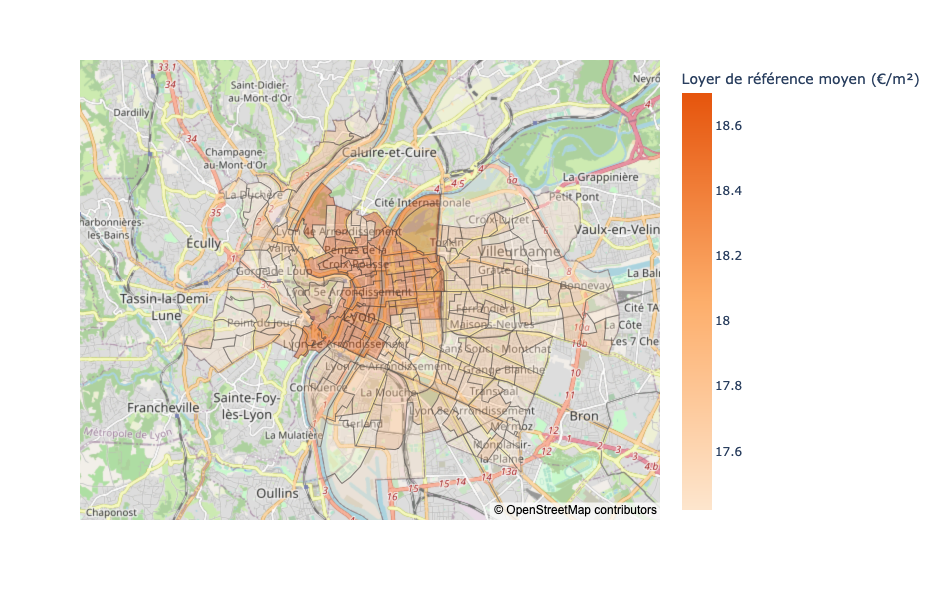

In [136]:
fig = px.choropleth_mapbox(
    selected_gdf_mean,
    geojson=selected_gdf_mean.geometry,
    locations=selected_gdf_mean.index,
    color=selected_gdf_mean.value.round(2),
    center={"lat": 45.764043, "lon": 4.835659},
    mapbox_style="open-street-map",
    zoom=11,
    height=600,
    opacity=0.4,
    labels={"color": "Loyer de référence moyen (€/m²)"},
    color_continuous_scale=["#fee6ce", "#fdae6b", "#e6550d"],
)
fig.show()